### Здравствуйте, меня зовут *Дарья Петренко*, вот моё Задание №3!

---
# Сравнение моделей регрессии

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
rmodels = pd.read_table("rmodels.txt")
rmodels.sample(5)

,err1,err2
384,-0.780257,-0.785579
172,-0.264314,-0.297408
53,1.681397,1.673835
793,0.568125,0.480621
693,0.813619,0.820140


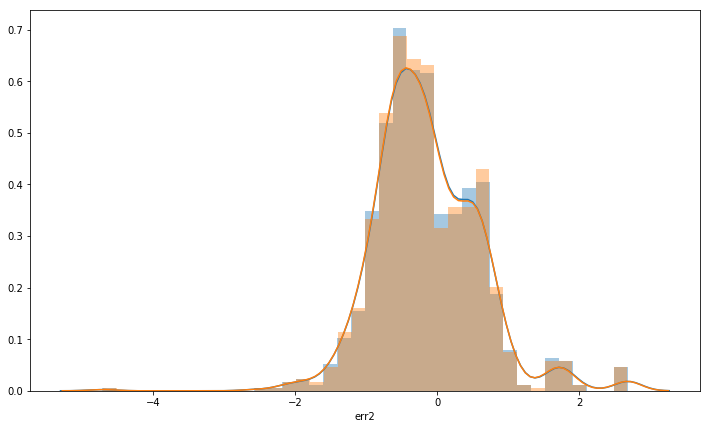

In [3]:
plt.figure(figsize=(12, 7))
sns.distplot(rmodels["err1"])
sns.distplot(rmodels["err2"])

Проверьте данные на нормальность с помощью тестов Колмогорова-Смирнова `kstest(x, 'norm')` и Шапиро-Уилка `shapiro(x)` библиотеки `scipy`. Можно ли использовать qq-график для обоснования использования методов, подразумевающих нормальность? То есть, можем ли мы на основе qq-графика удостовериться в том, что, например, двухвыборочный t-критерий Стьюдента использовать правомернo?

In [125]:
from scipy.stats import kstest, shapiro
from statsmodels.graphics.gofplots import qqplot

В случае, когда выборки независимы, нужно проверить нормальность обеих выборок.

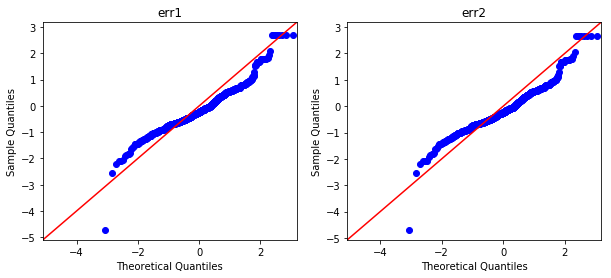

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

qqplot(rmodels.err1, line='45', ax=ax[0])
ax[0].set_title('err1')
qqplot(rmodels.err2, line='45', ax=ax[1])
ax[1].set_title('err2');

In [36]:
print('Kolmogorov-Smirnov test for err1: p-value=', kstest(rmodels.err1, 'norm')[1])
print('Kolmogorov-Smirnov test for err2: p-value=', kstest(rmodels.err2, 'norm')[1])
print()
print('Shapiro-Wilk test for err1: p-value=', shapiro(rmodels.err1)[1])
print('Shapiro-Wilk test for err2: p-value=', shapiro(rmodels.err2)[1])

Kolmogorov-Smirnov test for err1: p-value= 5.106513019549098e-18
Kolmogorov-Smirnov test for err2: p-value= 2.6272748192454066e-18

Shapiro-Wilk test for err1: p-value= 8.689481777590516e-16
Shapiro-Wilk test for err2: p-value= 1.198743473327388e-15


В случае, когда выборки связанные, нужно проверить нормальность попарной разности выборок.

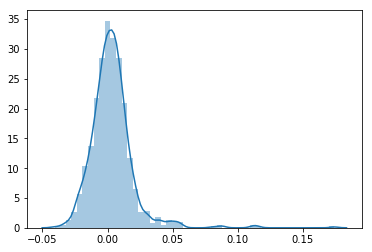

In [133]:
sns.distplot(rmodels.err1 - rmodels.err2);

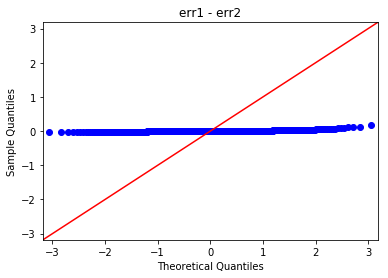

In [129]:
qqplot(rmodels.err1 - rmodels.err2, line='45')
plt.title('err1 - err2');

In [41]:
print('Kolmogorov-Smirnov test: p-value=', kstest(rmodels.err1 - rmodels.err2, 'norm')[1])
print()
print('Shapiro-Wilk test: p-value=', shapiro(rmodels.err1 - rmodels.err2)[1])

Kolmogorov-Smirnov test: p-value= 3.4835193393949945e-195

Shapiro-Wilk test: p-value= 5.905189722824731e-30


В случае независимых выборок QQ-графики показывают незначительное отклонение от нормальности. Однако при применении методов, предполагающих нормальность данных, не стоит руководствоваться только визуализацией, нужно применить другие, более мощные критерии. Тесты Колмогорова-Смирнова и Шапиро-Уилка дают очень маленькое значение p-value, следовательно, мы отвергаем гипотезу H0 о нормальности. Методы, предполагающие нормальность данных, могут дать некорректный результат, и применять на таких данных их не стоит.

Эксперименты показали, что даже если на QQ-графике не видно существенных отклонений от нормальности, применение более мощных критериев может отвергнуть гипотезу о нормальности с очень маленьким достигаемым уровнем значимости. То есть QQ-график можно использовать скорее для того, чтобы отвергнуть гипотезу о нормальности для данных, распределение которых сильно отлично от нормального (чтобы не использовать более мощные методы с высокой вычислительной сложностью). Но если визуальный метод не позволяет отвергнуть гипотезу, то нужно попробовать отвергнуть ее с помощью других критериев.


В случае зависимых выборок критерии Колмогорова-Смирнова и Шапиро-Уилка отвергают гипотезу H0. Более того, QQ-график показывает, что отклонение от нормальности существенное. Следовательно, стоит воздержаться от применения любых методов, требующих нормальности.

# Критерий Уилкоксона-Манна-Уитни для независимых выборок.

Первая идея, когда мы слышим слова “гипотеза о равенстве средних”, это конечно t-критерий Стьюдента. Это и понятно – действительно, если данные приходят из нормального распределения, то этот критериий достаточно мощный и использовать следует именно его. Кроме того, этот критерий достаточно устойчив к незначительным отклонениям от нормальности.

При этом на практике и в индустрии подавляющее большинство реальных данных никогда не распределено по нормальному закону. Есть ли хорошие альтернативы этому критерию?

Такой альтернативой, которую часто исопльзуют на практике, является критерий ранговых сумм Уилкоксона-Манна-Уитни. Рассмотрим модель смеси двух нормальных распределений

$$F(x) = (1-\varepsilon)\Phi(x) +\Phi(x/3) $$ 

Интересно, что уже при $\varepsilon \ge 0.01$ критерий ранговых сумм становится более точным критерием (имеет меньшую асимптотическую дисперсию), чем t-критерий. Кроме того есть теорема, что этот критерий не может потерять в асимптотической точности больше, чем $14$% и может быть сколь угодно более точным, чем $t$-критерий. Именно поэтому критерий ранговых сумм так важен для практического применения.

Проверьте гипотезу об однородности двух распределений, из которых получены выборки с помощью критерия Уилкоксона-Манна-Уитни.

Так как выборки большого размера, будем использовать аппроксимацию нулевого распределения нормальным.

In [3]:
from scipy.stats import norm

In [8]:
def rank(x):
    unique, counts = np.unique(x, return_counts=True)
    order = x.argsort()
    ranks = order.argsort().astype(np.float) + 1
    for num in unique[(counts - 1).astype(np.bool)]:
        ranks[x == num] = np.mean(ranks[x == num])
    return ranks

In [20]:
def mannwhitneyu_test(x1, x2, alternative='two-sided'):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    x = np.concatenate([x1, x2])
    ranks = rank(x)
    t_stat = np.sum(ranks[:n1])
    
    mu = n1 * (n1 + n2 + 1) / 2
    sigma = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    
    if alternative == 'less':
        return norm.cdf(t_stat, mu, sigma)
    
    if alternative == 'greater':
        return 1 - norm.cdf(t_stat, mu, sigma)
        
    
    if alternative == 'two-sided':
        return 2 * min(norm.cdf(t_stat, mu, sigma), 1 - norm.cdf(t_stat, mu, sigma))

In [33]:
mannwhitneyu_test(rmodels.err1.values, rmodels.err2.values, alternative='two-sided')

0.9087869916154556

Значение p-value больше порога в 0.05, следовательно, нет оснований для отвержения нулевой гипотезы об однородности распределений.

# Двухвыборочный перестановочный критерий для независимых выборок.

Другим мощным классом статистических критериев является класс перестановочных критериев.

Чтобы лучше понять сферу применений перестановочного критерия, дадим некоторое его сравнение с $t$-критерием:

- $t$-критерий формирует нулевую гипотезу относительно равенства средних, перестановочные критерии, как правило, задают нулевую гипотезу более широко – в терминах равенства распределений

Двухвыборочный $t$-критерий подразумевает, что нормальным должно быть распределение разностей $\bar{X}_1−\bar{X}_2$, и основывается на том, что правильным образом отнормированная эта разность распределена по закону Стьюдента. Перестановочные критерии считают статистику по данным, не прибегая к гипотезам о конкретном виде распределения, и оценивают распределение с помощью повторных выборок из данных.

- $t$-критерий дает точные значения достигаемого уровня значимости только если разность между средними в двух группах имеет распределение не сильно отклоняющееся от нормального. Перестановочный тест дает точное значение $p_{value}$ даже если распределение очень сильно отклоняется от нормального.

Перестановочный тест часто используется, когда нужна большая точность и предположение о нормальности данных нереалистично, а также для того, чтобы проверить эти предположения.

В частности, для проверки этого предположения часто прибегают к следующей процедуре. Из объединенной выборки выбирают случайно по схеме без возвращения столько объектов, сколько было изначально в одной из них (скажем, в первой). Остальные объекты полагают попавшими во вторую группу. Дальше считают некоторую статистику (в данном случае разницу средних значениях в этих двух группах) и ее запоминают.

Повторяя такую процедуру много раз, достигаемый уровень значимости получают как долю значений статистики (разности средних в нашем примере) таких же или более экстремальных, чем значение статистики, которое получилось по исходным выборкам (из которых мы делаем псевдовыборки). Если это значение находится далеко от $p_{value}$ $t$-критерия, то считается, что $t$-критерий для этих данных ненадежен.

Тонкий вопрос о том, сколько нужно сделать таких псевдовыборок, решают следующим образом. Если истинное значение достигаемого уровня значимости равно $p$, то стандартное отклонение оценки $p_{value}$ равно $\sqrt{p(1−p)/B}$, где $B$ - это количество сделанных псевдовыборок. Часто также переходят к верхней оценке этого значения $(\sqrt{1/(4B)})$.

- Реализуйте подобную процедуру самостоятельно для точности порядка $10^{-4}$.
- Cравните получившееся p-value с таковым для $t$-критерия.
- Cравните получившееся p-value с таковым для критерия Манна-Уитни `mannwhitneyu`.

Для снижения вычислительной сложности эксперимента процедура реализована для точности порядка 1е-3.

In [120]:
def perm_test_ind(x1, x2, B, alternative='two-sided'):
    n1 = x1.shape[0]
    x = np.concatenate([x1, x2])
    n = x.shape[0]
    mean_list = []
    
    t_stat = x1.mean() - x2.mean()
    print('t_stat:', t_stat)
    
    for iter in range(B):
        sample_ind = np.random.choice(np.arange(n), n1, replace=False)
        x1_sample = x[sample_ind]
        x2_sample = np.delete(x, sample_ind)
        mean_list.append(x1_sample.mean() - x2_sample.mean())
        
    zero_distr = np.array(mean_list)
    plt.hist(zero_distr, bins=100)
    plt.show()
    
    if alternative == 'less':
        return (zero_distr <= t_stat).mean()
    
    if alternative == 'greater':
        return (zero_distr >= t_stat).mean()
    
    if alternative == 'two-sided':
        return 2 * min((zero_distr <= t_stat).mean(), (zero_distr >= t_stat).mean())

t_stat: 0.0032766997935748665


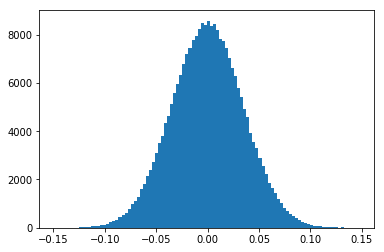

0.924368

In [123]:
perm_test_ind(rmodels.err1.values, rmodels.err2.values, 250000, 'two-sided')

In [80]:
from scipy.stats import ttest_ind, mannwhitneyu

In [92]:
ttest_ind(rmodels.err1.values, rmodels.err2.values)[1]

0.9251022877301072

In [93]:
mannwhitneyu(rmodels.err1.values, rmodels.err2.values, alternative='two-sided')[1]

0.9088230165122059

Значение p-value, полученное с помощью перестановочного критерия для несвязанных выборок с точностью 1e-3, совпадает со значением p-value t-теста в первых двух знаках. Но несмотря на это, значением t-критерия не стоит руководствоваться при принятии решения о том, можно ли отклонить нулевую гипотезу, так как при исследовании данных было выявлено их сильное отклонение от нормальности. В нашем случае применение t-критерия позволяет принять то же решение, что и применение критериев, не требующих нормальности, но это может быть случайностью, и на других данных получилось бы по-другому.

Значение p-value для критерия Манна-Уитни меньше. Можно предположить, что для количественных данных лучше использовать перестановочные критерии, так как мы теряем меньше информации из выборок, не переходя от значений к рангам.

Оба критерия, не требующие нормальности данных, дают значение p-value больше порога в 0.05, следовательно, нет оснований для отклонения гипотезы H0 о равенстве средних.

# Двухвыборочный перестановочный критерий для зависимых выборок.

В случае, если выборки связаны, то предыдущая схема неприменима: нет смысла переставлять значения между разными объектам. В таком случае прибегают к тому, что переставляют значения внутри каждого объекта, получая таким образом новые псевдовыборки, по которым также считают статистику и запоминают ее. Повторяя такую процедуру много раз, $p_{value}$ находят также, как и в предыдущем случае – считая долю таких же или еще более экстремальных значений статистики по псевдовыборкам в сравнении со статистикой, посчитанной по исходной выборке.

- Реализуйте описанную процедуру самостоятельно для точности порядка $10^{-4}$.
- Cравните получившееся $p_{value}$ с таковым для t-критерия.
- Cравните получившееся $p_{value}$ с таковым для критерия Уилкоксона `wilcoxon`.

Не забудьте, что вам в данном случае каждый из критериев нужно вызвать с параметрами, соответствующими связанным выборкам.

Для снижения вычислительной сложности эксперимента процедура реализована для точности порядка 1е-3.

In [118]:
def perm_test_rel(x1, x2, B, alternative='two-sided'):
    n = x1.shape[0]
    mean_list = []
    
    t_stat = x1.mean() - x2.mean()
    print('t_stat:', t_stat)
    
    for iter in range(B):
        sample_mask = np.random.choice(np.array([0, 1]), n)
        x1_sample = x1 * sample_mask + x2 * (1 - sample_mask)
        x2_sample = x1 * (1 - sample_mask) + x2 * sample_mask
        mean_list.append(x1_sample.mean() - x2_sample.mean())
        
    zero_distr = np.array(mean_list)
    plt.hist(zero_distr, bins=100)
    plt.show()
    
    if alternative == 'less':
        return (zero_distr <= t_stat).mean()
    
    if alternative == 'greater':
        return (zero_distr >= t_stat).mean()
    
    if alternative == 'two-sided':
        return 2 * min((zero_distr <= t_stat).mean(), (zero_distr >= t_stat).mean())

t_stat: 0.0032766997935748665


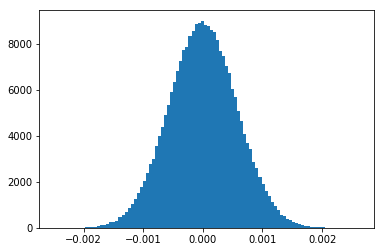

0.0

In [119]:
perm_test_rel(rmodels.err1.values, rmodels.err2.values, 250000, 'two-sided')

In [112]:
from scipy.stats import ttest_rel, wilcoxon

In [114]:
ttest_rel(rmodels.err1.values, rmodels.err2.values)[1]

6.924007691101542e-09

In [116]:
wilcoxon(rmodels.err1.values, rmodels.err2.values, alternative='two-sided')[1]

3.6665224292023824e-07

Точности, с которой вычислено значение p-value для перестановочного теста, недостаточно для сравнения с p-value t-критерия и построения выводов о его применимости. Оба критерия дают значение p-value меньше порога в 0.05, позволяя отвергнуть нулевую гипотезу в пользу альтернативной. Однако, вспоминая вид QQ-графика для разности выборок, можно предположить, что t-критерий для данной задачи может привести к неверным результатам, даже несмотря на то, что в данной задаче конечные результаты применения критериев совпадают, так как распределение разности выборок сильно отклоняется от нормального.

Рассуждения о сравнении с ранговым критерием аналогичны случаю несвязанных выборок.

В предположении о том, что выборки связаны, все три критерия дают значение p-value меньше порога в 0.05. Следовательно, нулевая гипотеза отвергается в пользу альтернативной. Делаем вывод, что средние значения выборок не равны.


# Выводы

Можно сделать следующие выводы о применимости различных критериев: 
* QQ-график может использоваться только для того, чтобы отвергнуть гипотезу о нормальности для данных, распределение которых сильно отлично от нормального. Если с помощью визуального метода отвергнуть гипотезу не удалось, нужно попробовать отвергнуть ее, применив более мощные критерии (например, Колмогорова-Смирнова или Шапиро-Уилка). Не стоит применять методы, предполагающие нормальность данных, руководствуясь только QQ-графиком.
* Если данные имеют отклонение от нормальности, то не следует применять критерии, требующие нормальности выборок, так как они могут давать некорректные результаты.
* Ранговые и перестановочные критерии не требуют начальных предположений о распределении выборок и являются универсальными. 
* Ранговый критерий позволяет для большого объема данных использовать приближение нулевого распределения нормальным. Следовательно, является менее вычислительно сложным, чем перестановочный критерий, который нельзя ничем приблизить.
* Для количественных данных перестановочный критерий учитывает больше информации о выборке, чем ранговый, так как не переходит от исходных значений к их рангам.